In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, .5)
data = np.append(np.random.normal(100, 50, size=300), np.random.normal(120, 100, size=300))

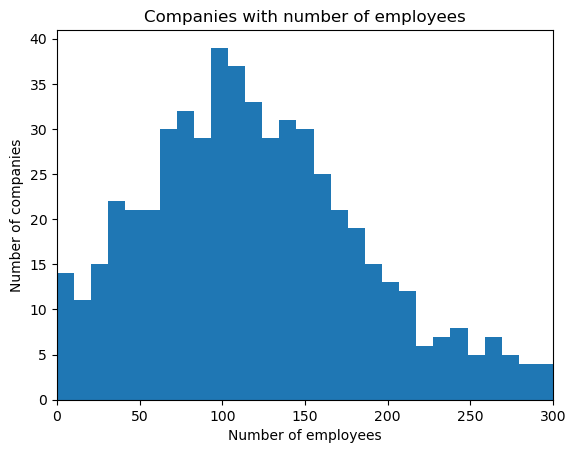

In [2]:
plt.hist(data, bins=np.linspace(0, 300, 30))
plt.xlim(0, 300)
plt.title("Companies with number of employees")
plt.xlabel("Number of employees")
plt.ylabel("Number of companies")
plt.savefig("companiesNumberEmployees.png", bbox_inches="tight")

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(5)
RidgeLA = Ridge(alpha=1e1)
RidgeMA = Ridge(alpha=1e5)
RidgeHA = Ridge(alpha=1e9)
pX = poly.fit_transform(x.reshape(-1, 1))
data = x * np.sin(x) * np.exp(-(10 - x) / 10) + x / 1.5 * np.random.rand(len(x))
data = np.append(np.random.normal(100, 50, size=20), np.random.normal(120, 100, size=20))
RidgeLA.fit(pX, data)
RidgeMA.fit(pX, data)
RidgeHA.fit(pX, data)
xV = np.arange(0, 10, .01).reshape(-1, 1)
pXV = poly.transform(xV)

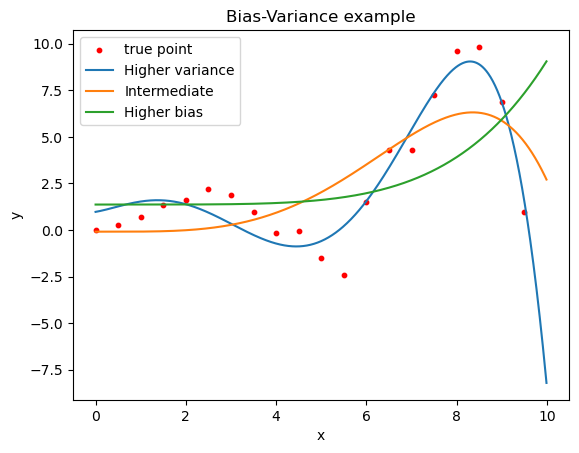

In [9]:
plt.scatter(x, data, color="red", label="true point", s=10)
plt.plot(xV, RidgeLA.predict(pXV), label="Higher variance")
plt.plot(xV, RidgeMA.predict(pXV), label="Intermediate")
plt.plot(xV, RidgeHA.predict(pXV), label="Higher bias")
plt.title('Bias-Variance example')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("biasVarianceExample.png", bbox_inches="tight")

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml

logReg_clf = LogisticRegression(warm_start=True,max_iter=1,verbose=False)
data= fetch_openml('mnist_784', version=1, parser='auto')  # Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"], data["target"]],
                      columns = data["feature_names"]+["target"])

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [ ]:
from sklearn.metrics import log_loss
iters = 300
valLoss = []
trainLoss = []

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=1)
for train_index, val_index in stratSplit.split(X_train[data["feature_names"]], y_train):
    X_train_v = X_train[data["feature_names"]].iloc[train_index]
    X_val = X_train[data["feature_names"]].iloc[val_index]

    y_train_v = y_train.iloc[train_index]
    y_val = y_train.iloc[val_index]

for i in range(iters):
    logReg_clf.fit(X_train_v, y_train_v)
    trainLoss.append(log_loss(y_true=y_train_v.values,
                              y_pred=logReg_clf.predict_proba(X_train_v),
                              labels=['0','1','2','3','4','5','6','7','8','9']))
    valLoss.append(log_loss(y_true=y_val.values,
                            y_pred=logReg_clf.predict_proba(X_val),
                            labels=['0','1','2','3','4','5','6','7','8','9']))

In [ ]:
for i in range(iters):
    logReg_clf.fit(X_train_v, y_train_v)
    trainLoss.append(log_loss(y_true=y_train_v.values,
                              y_pred=logReg_clf.predict_proba(X_train_v),
                              labels=['0','1','2','3','4','5','6','7','8','9']))
    valLoss.append(log_loss(y_true=y_val.values,
                            y_pred=logReg_clf.predict_proba(X_val),
                            labels=['0','1','2','3','4','5','6','7','8','9']))

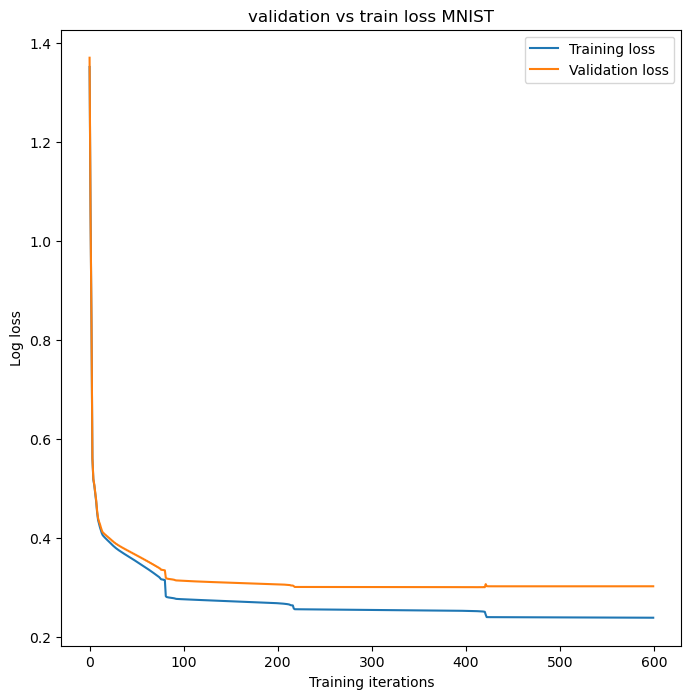

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(range(len(trainLoss)), trainLoss,label="Training loss")
plt.plot(range(len(valLoss)), valLoss,label="Validation loss")
plt.legend()
plt.title("validation vs train loss MNIST")
plt.xlabel("Training iterations")
plt.ylabel("Log loss")
plt.savefig("validationVsTrainingLoss.png", bbox_inches="tight")
plt.show()